In [1]:
import sys
sys.path.append('../..')
sys.path.append('../data')
sys.path.append('../../helper_code')

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import numpy as np
import pandas as pd
from IPython.display import display
import copy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from helper_code.custom_kernel import create_similarity_matrix_nb, extended_gaussian_kernel_nb
from helper_code.util import evaluate_performance_v2, evaluate_performance_custom_kernel_v2

In [2]:
input_dataset = ['c', 'c_lexi', 'CE', 'CE_lexi', 'CSE', 'CSE_lexi']
dataset_dict = {}

for data in input_dataset:
    dataset_dict[data] = pd.read_csv(f'../data/coronene_training_data/{data}.csv')
    dataset_dict[f"IDM_{data}"] = pd.read_csv(f'../data/coronene_training_data/[IDM]{data}.csv')

D_etot = pd.read_csv(f'../data/coronene_training_data/delta_total_energy.csv')
DD_etot = pd.read_csv(f'../data/coronene_training_data/DD_e_tot.csv')

In [29]:
model_collection = {}
performance_summary = {}

## CSE with Gaussian ##

### No Lexi, D_etot ###

In [6]:
X = dataset_dict['CSE'].to_numpy()
y = D_etot.to_numpy()

best_params = {'alpha': 2.2425013674157485e-08, 'gamma': 8.136151536502313e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [10, 20, 40, 80, 160, 320, 640, 1280]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_v2(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_Gaussian'] = model
performance_summary['ANM_CSE_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,10,3187.253147,600.464362
2,20,1229.915297,384.330361
3,40,152.889167,23.959816
4,80,264.379584,241.087667
5,160,222.572828,153.655379
6,320,152.853736,62.410956
7,640,121.944803,23.81397
8,1280,110.533716,12.793468


### With Lexi, D_etot ###

In [30]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = D_etot.to_numpy()

best_params = {'alpha': 1.5182042161569614e-12, 'gamma': 6.03689365016129e-10, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [10, 20, 40, 80, 160, 320, 640, 1280]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_v2(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian'] = model
performance_summary['ANM_CSE_lexi_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,10,2867.614292,302.125275
2,20,1018.036366,346.71395
3,40,151.588105,28.356354
4,80,255.051305,208.99799
5,160,229.529419,164.016664
6,320,157.394751,63.145798
7,640,122.835148,23.509352
8,1280,111.074255,12.435937


### With Lexi, DD_etot ###

In [8]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = DD_etot.to_numpy()

best_params = {'alpha': 0.0025629074500422688, 'gamma': 1.8104490522288843e-07, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [10, 20, 40, 80, 160, 320, 640, 1280]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_v2(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian_delta'] = model
performance_summary['ANM_CSE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,10,136.615664,5.912219
2,20,135.588474,12.13448
3,40,130.532043,13.298639
4,80,133.098436,23.794693
5,160,134.750197,37.336436
6,320,121.300283,26.277565
7,640,109.789167,19.391222
8,1280,105.971969,13.844416


## CSE with Extended Gaussian ##

### With Lexi, D_etot ###

In [31]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = D_etot.to_numpy()

best_params = {'alpha': 4.082588287978896e-08, 'beta': 2.0167466950900717e-07, 'epsilon': 2.142512351831609e-08, 'gamma': 4.181167988054245e-09}
model = KernelRidge(kernel='precomputed', alpha=best_params['alpha'])

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [10, 20, 40, 80, 160, 320, 640, 1280]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_custom_kernel_v2(model, X, y, num_training_sample, num_trials, extended_gaussian_kernel_nb, best_params)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_ex_Gaussian'] = model
performance_summary['ANM_CSE_lexi_ex_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,10,2083.336056,208.713923
2,20,1512.926013,174.240047
3,40,171.850706,43.27495
4,80,260.517073,217.394804
5,160,228.479654,162.702853
6,320,157.089664,62.522543
7,640,123.395123,23.794199
8,1280,114.057555,11.997909


### With Lexi, DD_etot ###

In [13]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = DD_etot.to_numpy()

best_params = {'alpha': 0.00028513857657025936, 'beta': 1.1753499166909471e-08, 'epsilon': 3.0350353283034606e-06, 'gamma': 1.1611337892690983e-07}
model = KernelRidge(kernel='precomputed', alpha=best_params['alpha'])

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [10, 20, 40, 80, 160, 320, 640, 1280]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_custom_kernel_v2(model, X, y, num_training_sample, num_trials, extended_gaussian_kernel_nb, best_params)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_ex_Gaussian_delta'] = model
performance_summary['ANM_CSE_lexi_ex_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,10,111.578183,16.011388
2,20,114.463317,16.88795
3,40,107.685128,17.678047
4,80,118.493335,32.074386
5,160,126.706279,42.275115
6,320,114.886317,26.241015
7,640,106.52906,17.099451
8,1280,104.523497,13.519466


## IDM ##

### C-squared ###

In [17]:
X = np.square(dataset_dict['IDM_c_lexi'].to_numpy())
y = D_etot.to_numpy()

best_params = {'alpha': 2.5660445817582803e-07, 'gamma': 2.7223264398794735e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [10, 20, 40, 80, 160, 320, 640, 1280]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_v2(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['IDM_C_sqaure'] = model
performance_summary['IDM_C_sqaure'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,10,3219.201505,452.49106
2,20,1109.955107,362.560548
3,40,156.692683,28.260936
4,80,267.73759,241.168432
5,160,243.029675,183.427794
6,320,153.873133,60.421146
7,640,121.070641,23.146055
8,1280,109.223819,13.903177


### CSE ###

In [32]:
X = dataset_dict['IDM_CSE_lexi'].to_numpy()
y = D_etot.to_numpy()

best_params = {'alpha': 2.9143654132589253e-13, 'gamma': 9.452129457528114e-10, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [10, 20, 40, 80, 160, 320, 640, 1280]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_v2(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['IDM_CSE_lexi_Gaussian'] = model
performance_summary['IDM_CSE_lexi_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,10,9923.213258,1674.143473
2,20,7549.719077,3405.299637
3,40,336.17903,98.263553
4,80,287.098603,239.544282
5,160,252.676916,186.137623
6,320,154.692901,59.956377
7,640,122.871372,21.941373
8,1280,113.671512,12.273925


### Extended Gaussian ###

In [33]:
X = dataset_dict['IDM_CSE_lexi'].to_numpy()
y = D_etot.to_numpy()

best_params = {'alpha': 3.675729391358022e-12, 'beta': 7.50981822257169e-09, 'epsilon': 1.0596237543876683e-08, 'gamma': 9.718114533626386e-14}
model = KernelRidge(kernel='precomputed', alpha=best_params['alpha'])

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [10, 20, 40, 80, 160, 320, 640, 1280]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_custom_kernel_v2(model, X, y, num_training_sample, num_trials, extended_gaussian_kernel_nb, best_params)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['IDM_CSE_lexi_ex_Gaussian'] = model
performance_summary['IDM_CSE_lexi_ex_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,10,10680.844647,1687.220187
2,20,6467.579982,2784.978689
3,40,774.977453,338.326992
4,80,322.379834,212.492212
5,160,261.40031,187.739775
6,320,156.728883,62.343758
7,640,122.382373,22.948765
8,1280,111.663496,12.713926


## Learning Curve ##

In [34]:
print(performance_summary.keys())

dict_keys(['ANM_CSE_lexi_Gaussian', 'ANM_CSE_lexi_ex_Gaussian', 'IDM_CSE_lexi_Gaussian', 'IDM_CSE_lexi_ex_Gaussian'])


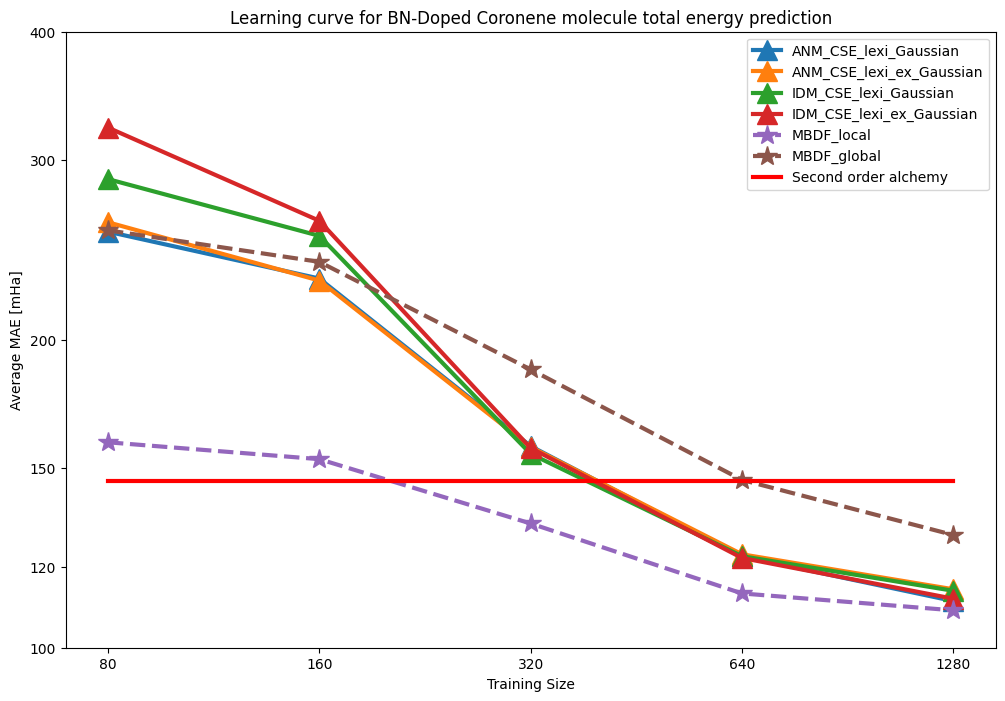

In [39]:
# performance_summary.pop("ANM_CSE_lexi_nd_Gaussian_delta")

target_key = ['ANM_CSE_lexi_Gaussian', 'ANM_CSE_lexi_ex_Gaussian',
              'IDM_CSE_lexi_Gaussian', 'IDM_CSE_lexi_ex_Gaussian']

plt.figure(figsize=(12, 8))

baseline = {# 'CM': [648.5527354673592, 537.6985692537448, 461.0180882987335, 379.9858538857778, 293.8438973546341, 241.82578139489823], 
            # 'BOB': [237.41250993141233, 175.25626039916506, 151.71095095761646, 138.19860398430035, 119.94745348162638, 104.37619882451854], 
            # 'Second Order Alchemy': [145.62546462994108] * 8,
            'MBDF_local': [184.59784535648154, 164.22280452583243, 146.57121401836062, 158.77643399968196, 152.8612979610525, 132.25907572913226, 112.99311945723645, 108.77700270516728], 
            'MBDF_global': [267.34866751435857, 173.77054851163828, 132.61813037056365, 255.81756044130967, 238.3110725198692, 187.04522095157284, 145.8770986733163, 128.87176623964308],
            }

x = performance_summary['ANM_CSE_lexi_Gaussian']['training size'][3:]
y_values = {}
baseline_y = {}
for key, df in performance_summary.items():
    if key in target_key:
        y_values[key] = df['average MAE (mHa)'][3:]
for key, value in baseline.items():
    baseline_y[key] = value[3:]

second_order_alchemy = [145.62546462994108] * 5

linewidth = 3
markersize = 15

for key, y_value in y_values.items():
    plt.plot(x, y_value, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)
for key, y_value in baseline_y.items():
    plt.plot(x, y_value, label=key, marker='*', linestyle='--', linewidth=linewidth, markersize=markersize) 
plt.plot(x, second_order_alchemy, label="Second order alchemy", marker='', linestyle='-', linewidth=linewidth, markersize=markersize, color='red')

plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
# xticks = [10, 20, 40, 80, 160, 320, 640, 1280]
# yticks = [100, 200, 400, 800, 1600, 3200, 6400]
xticks = [80, 160, 320, 640, 1280]
yticks = [100, 120, 150, 200, 300, 400]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.savefig('../graph/[Coronene] [15.0] Learning curve for BN-Doped Coronene molecule total energy prediction.png', dpi=300)
plt.show()